# Deep Auto Encoder (=Stacked Auto Encoder)

In [69]:
from keras.layers import Input, Dense
from keras.models import Model

In [70]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(64, activation='relu')(encoded1)
encoded3 = Dense(32, activation='relu')(encoded2)
# "decoded" is the lossy reconstruction of the input
decoded1 = Dense(64, activation='relu')(encoded3)
decoded2 = Dense(128, activation='relu')(decoded1)
decoded3 = Dense(784, activation='sigmoid')(decoded2)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded3)

In [71]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [72]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data() #grid에 흑백의 진하기 정도에 대한 값 + label

In [73]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Hidden Layer Units = 32

In [74]:
autoencoder.fit(x_train, x_train,
                nb_epoch=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s - loss: 0.3589 - val_loss: 0.2641
Epoch 2/20
60000/60000 [==============================] - 8s - loss: 0.2580 - val_loss: 0.2495
Epoch 3/20
60000/60000 [==============================] - 8s - loss: 0.2412 - val_loss: 0.2314
Epoch 4/20
60000/60000 [==============================] - 8s - loss: 0.2264 - val_loss: 0.2198
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 0.2139 - val_loss: 0.2085
Epoch 6/20
60000/60000 [==============================] - 9s - loss: 0.2023 - val_loss: 0.1987
Epoch 7/20
60000/60000 [==============================] - 10s - loss: 0.1938 - val_loss: 0.1895
Epoch 8/20
60000/60000 [==============================] - 9s - loss: 0.1870 - val_loss: 0.1841
Epoch 9/20
60000/60000 [==============================] - 10s - loss: 0.1795 - val_loss: 0.1751
Epoch 10/20
60000/60000 [==============================] - 11s - loss: 0.1736 - val_loss: 0.1

In [75]:
# this model maps an input to its encoded representation
encoder1 = Model(input=input_img, output=encoded1)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(128,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-5]
encoder2 = Model(input=encoded_input, output=decoder_layer(encoded_input))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(64,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-4]
encoder3 = Model(input=encoded_input, output=decoder_layer(encoded_input))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(32,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]
decoder1 = Model(input=encoded_input, output=decoder_layer(encoded_input))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(64,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-2]
decoder2 = Model(input=encoded_input, output=decoder_layer(encoded_input))

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(128,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
decoder3 = Model(input=encoded_input, output=decoder_layer(encoded_input))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs1 = encoder1.predict(x_test)
encoded_imgs2 = encoder2.predict(encoded_imgs1)
encoded_imgs3 = encoder3.predict(encoded_imgs2)
decoded_imgs1 = decoder1.predict(encoded_imgs3)
decoded_imgs2 = decoder2.predict(decoded_imgs1)
decoded_imgs3 = decoder3.predict(decoded_imgs2)

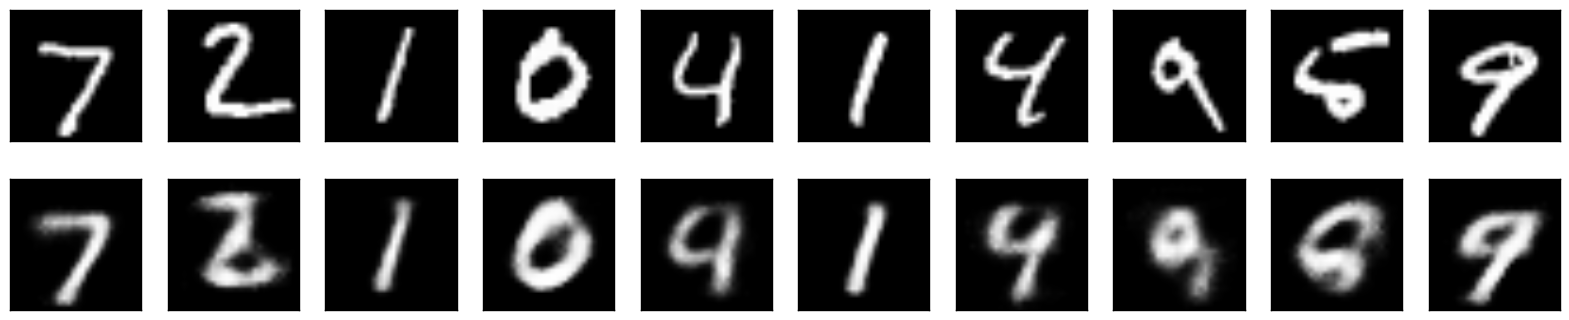

In [80]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()